# Testing

Тут просто тестирование библиотек

In [1]:
import math
import warnings

import numpy as np
import arviz as az
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.special as sc
import theano.tensor as tt
import matplotlib.pyplot as plt
from scipy import stats
#from theano import shared, function
#from pymc3.distributions.dist_math import betaln, bound

from custom import pert

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC v3.11.4
Running on ArviZ v0.11.2


In [ ]:
def compare(a, b, c, n, e):
    x = np.linspace(a, c, n+1, endpoint=False)[1:]
    t = tt.as_tensor_variable(x, name='tensor')

    with pm.Model() as model:
        p = pert(name='test', a=a, b=b,c=c, transform=None)

    y1 = np.array([model.logp({'test' : i}) for i in x])
    ey1 = np.exp(y1)

    alpha = 1 + 4 * (b - a) / (c - a)
    beta = 1 + 4 * (c - b) / (c - a)
    ab = alpha + beta

    arg1 = t - a
    arg2 = c - t
    arg3 = c - a

    logarg1 = tt.log(arg1)
    logarg2 = tt.log(arg2)
    logarg3 = tt.log(arg3)

    logp = (
        tt.switch(tt.eq(alpha, 1), 0, (alpha - 1) * logarg1)
        + tt.switch(tt.eq(beta, 1), 0, (beta - 1) * logarg2)
        - tt.switch(tt.eq(ab, 1), 0, (ab - 1) * logarg3)
        - pm.distributions.dist_math.betaln(alpha, beta)
    )

    y2 = pm.distributions.dist_math.bound(logp, t >= a, t <= c, alpha > 0, beta > 0).eval()
    ey2 = np.exp(y2)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
    if e:
        ax1.scatter(x, ey1, c='blue', s=2)
        ax2.scatter(x, ey2, c='darkorange', s=2)

        ax3.scatter(x, ey1, c='blue', s=2)
        ax3.scatter(x, ey2, c='darkorange', s=2)
    else:
        ax1.scatter(x, y1, c='blue', s=2)
        ax2.scatter(x, y2, c='darkorange', s=2)
        
        ax3.scatter(x, y1, c='blue', s=2)
        ax3.scatter(x, y2, c='darkorange', s=2)
    plt.show()

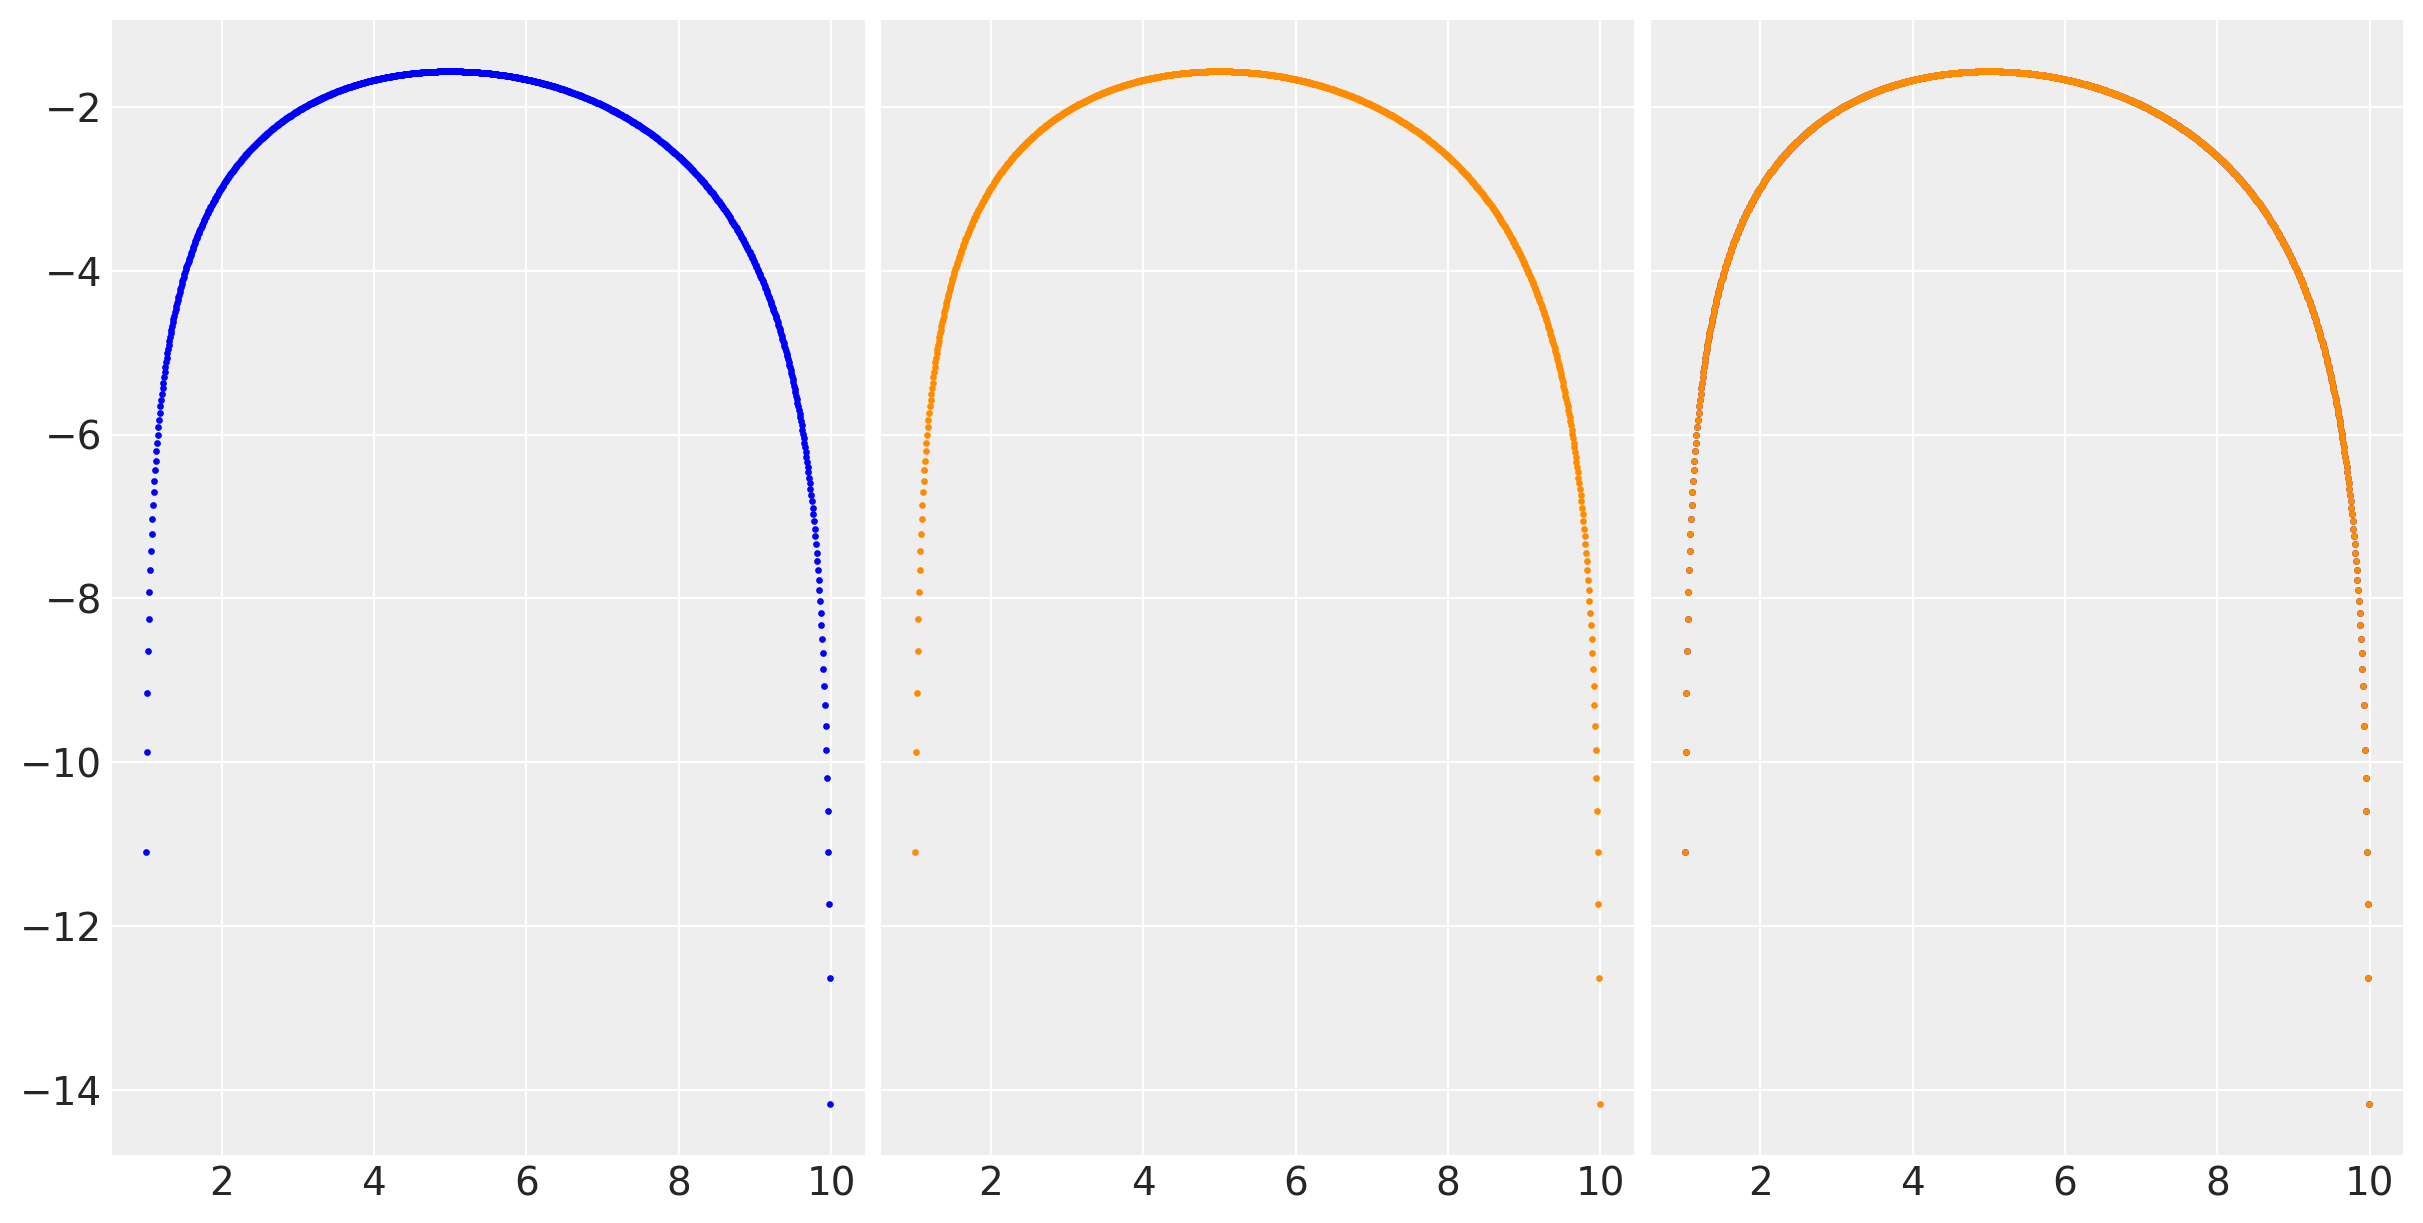

In [16]:
compare(1, 5, 10, 1000, False)

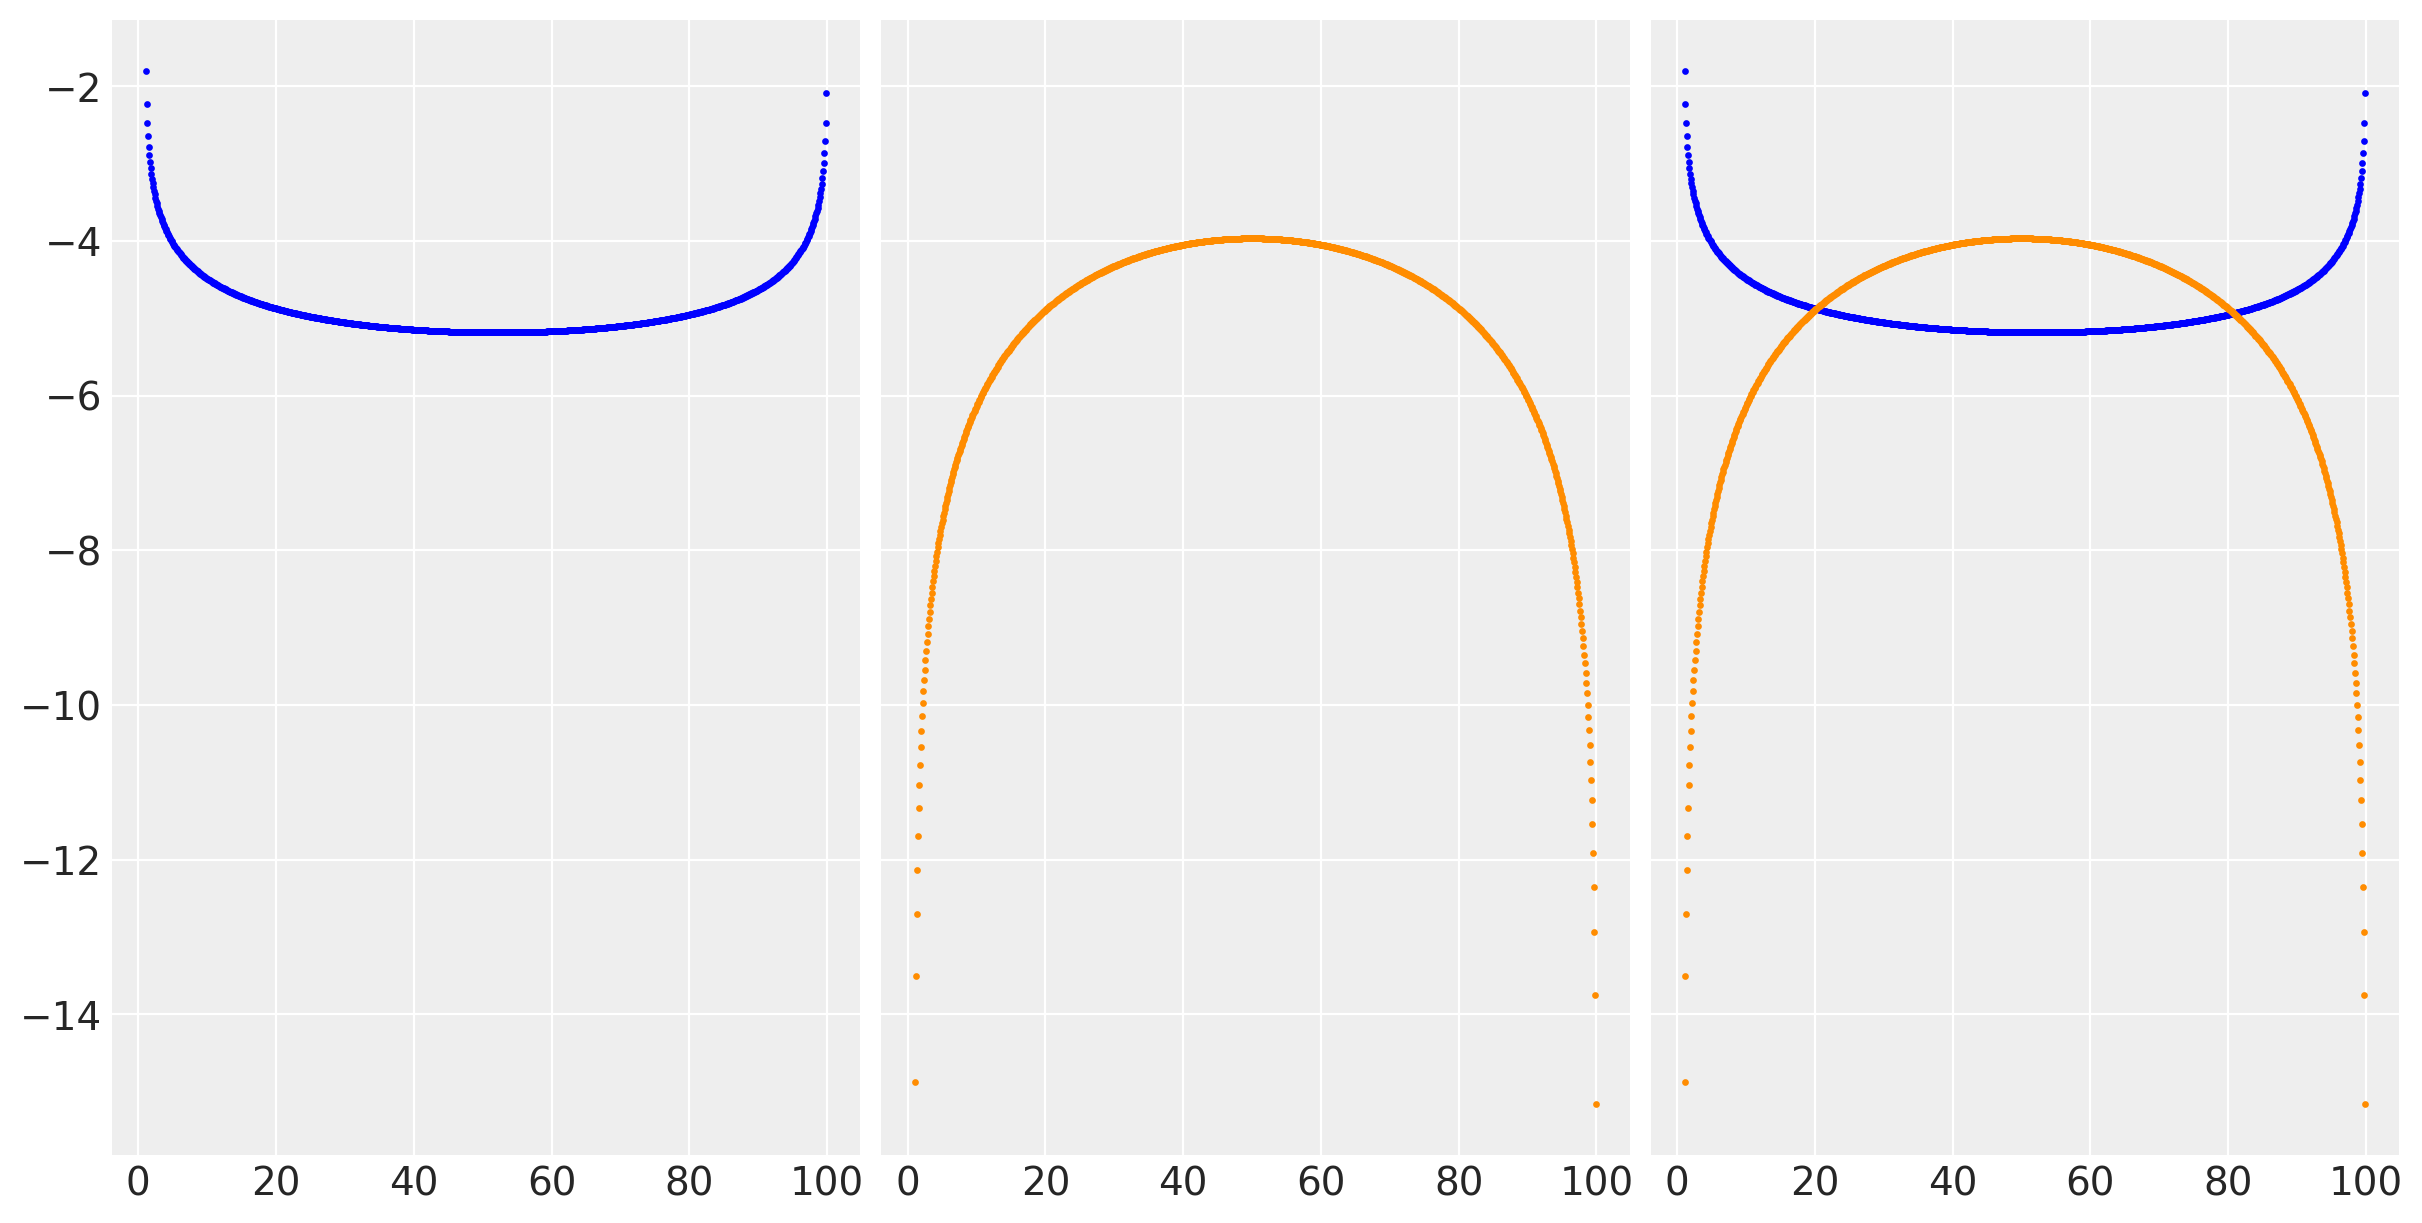

In [15]:
compare(1, 50, 100, 1000, False)

<AxesSubplot:ylabel='Count'>

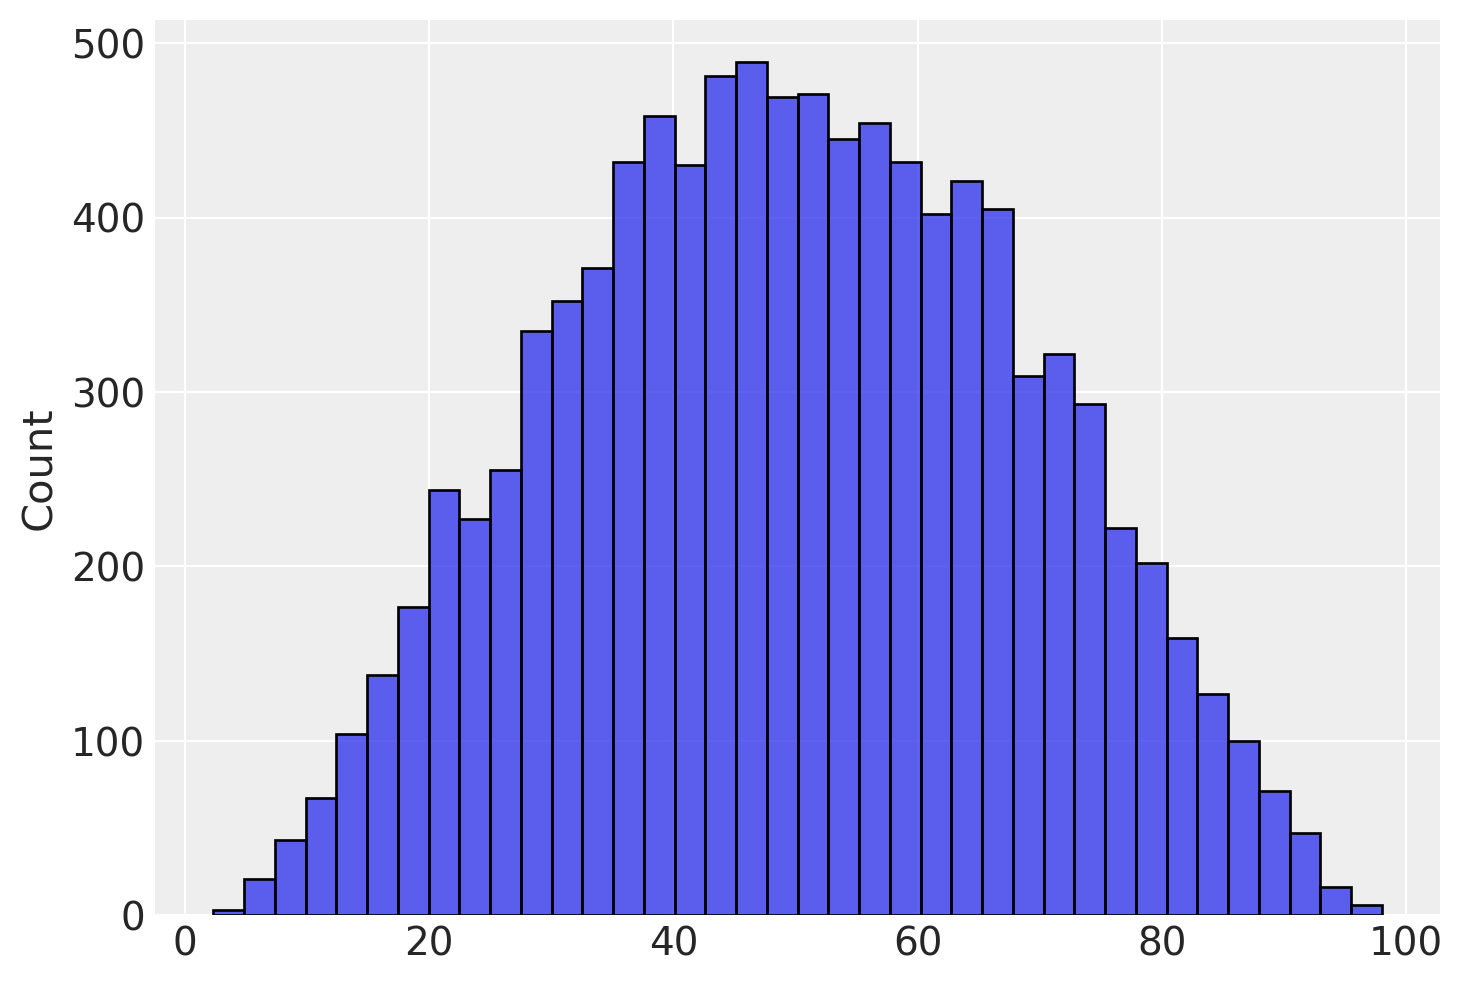

In [18]:
with pm.Model() as model:
    p = pert(name='test', a=1, b=50,c=100, transform=None).random(size=10000)
sns.histplot(p)

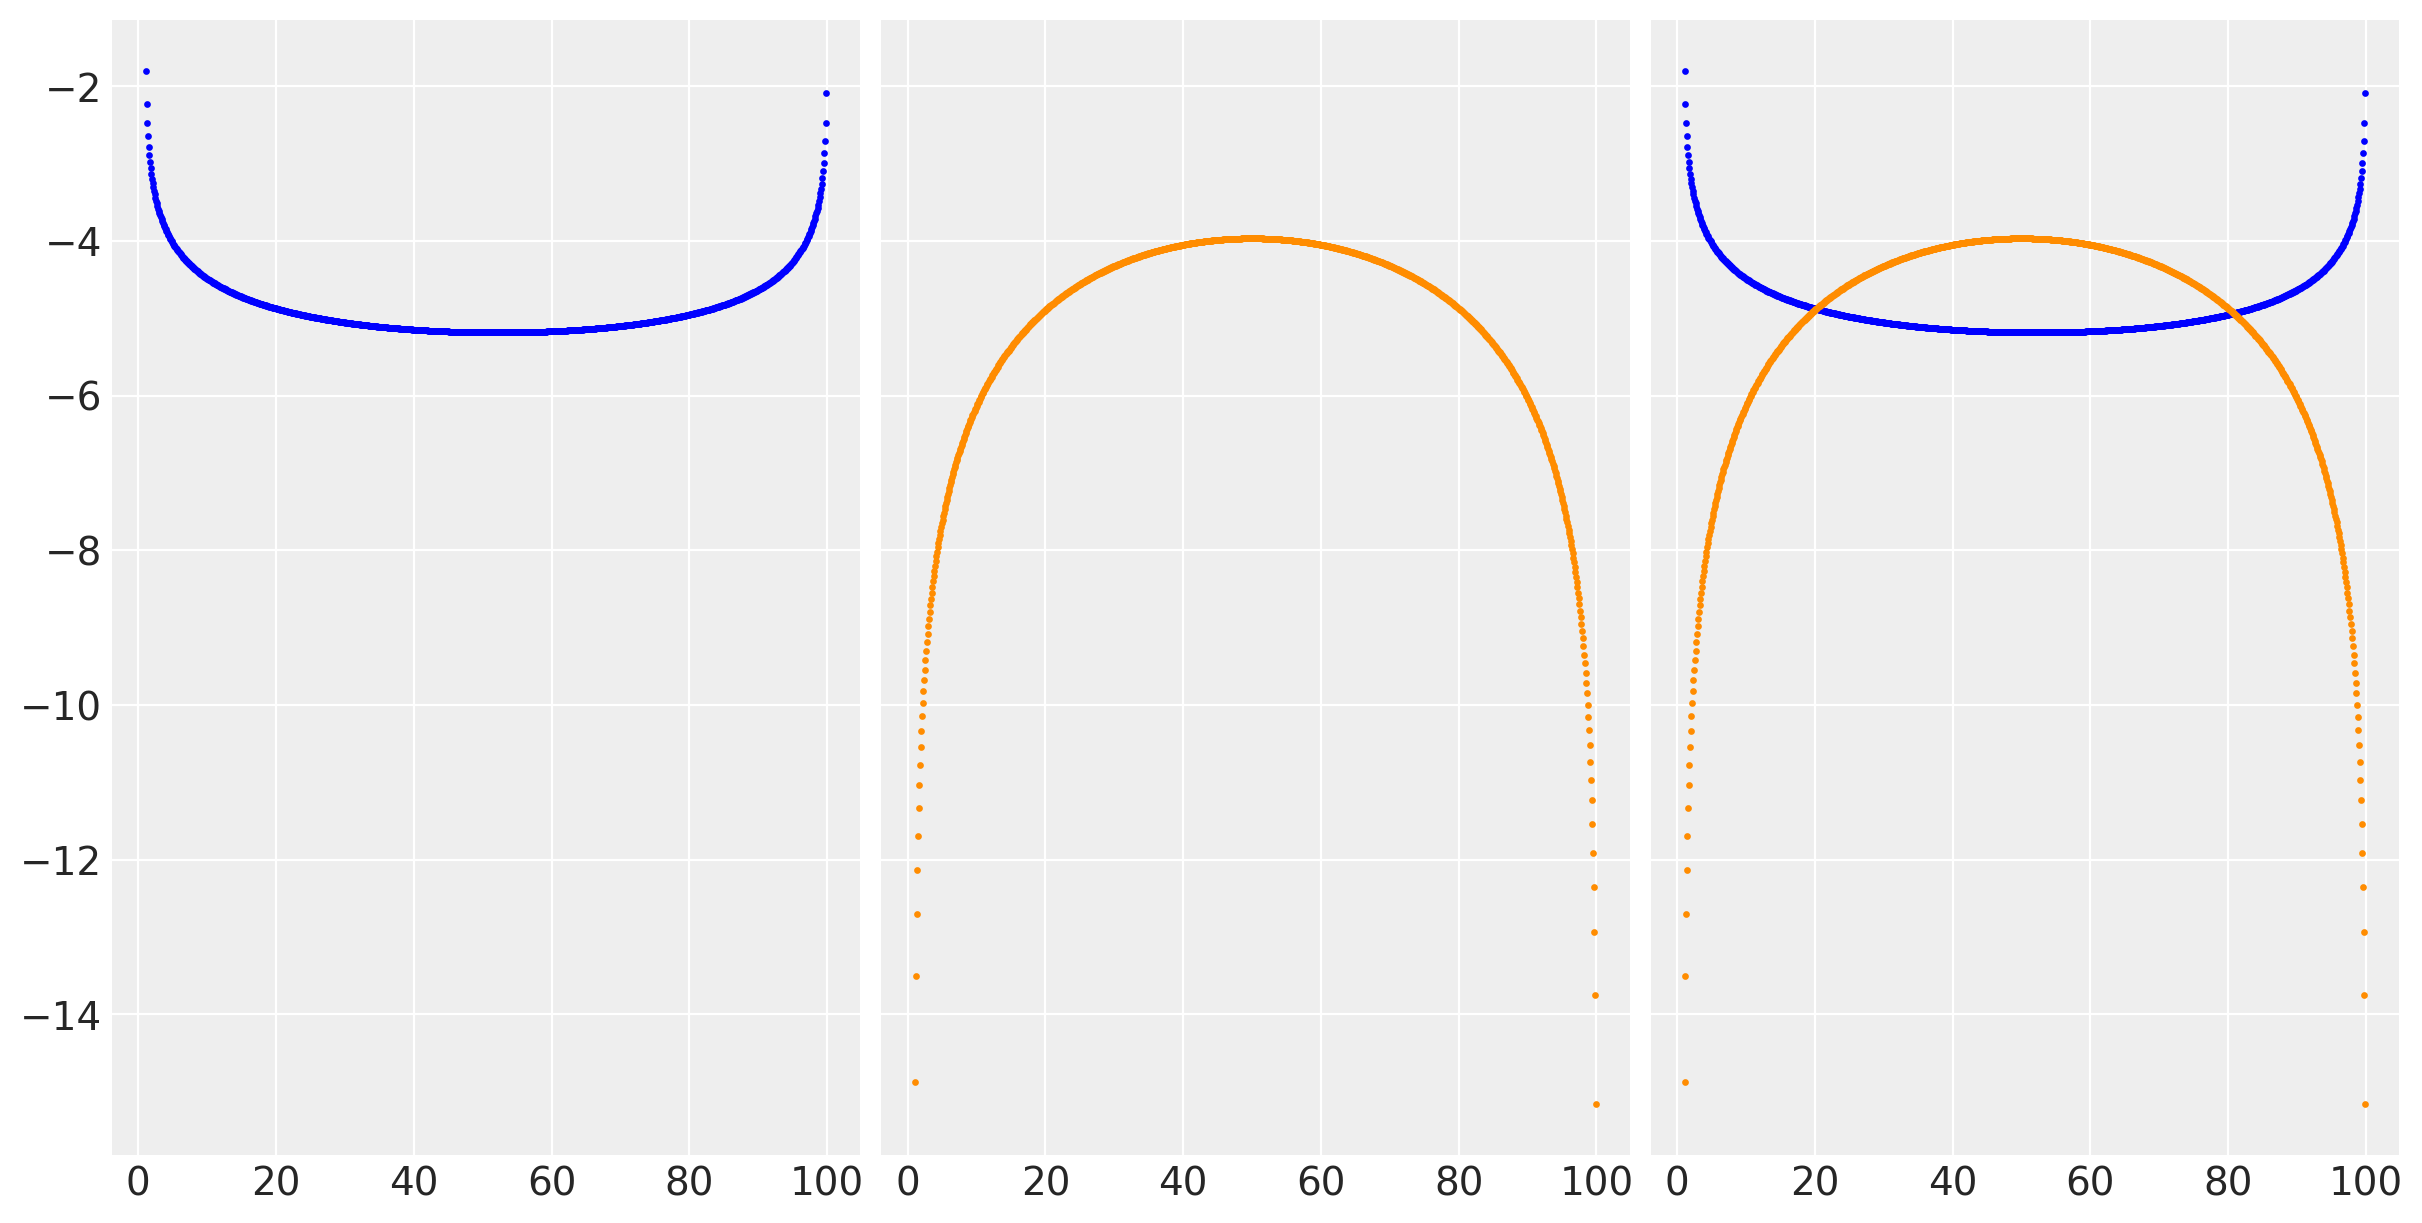

In [15]:
compare(1, 50, 100, 1000, False)